In [1]:
# n x t but make sure t is 9 condition - concatenate the results basically
# add choice - divide the plots into 2 i guess
# sort the heatmap so that it is easier to visulaise -- there is also this only half thing like cross validation but didnt understand ngl
# ccsp is probably not working - check that out 

In [ ]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


from pinkrigs_tools.dataset.query import load_data
from utils.utils import format_session
from class_objects.SessionData_v1 import session_data, exp_data

# Load & Format Data

In [3]:
# runs only when pandas==1.3.5 - run !pip install pandas==1.3.5
# recordings = load_data(subject = 'AV043',
# 					   expDate = '2024-03-14:2024-03-20', # 2024-03-14 or 2024-03-20 
# 					   expDef = 'multiSpaceWorld_checker_training',
# 					   data_name_dict= 'all-default')

recordings = load_data(subject = 'GB012',
					   expDate = '2024-11-22:2024-12-05', # 2024-03-14 or 2024-03-20 
					   expDef = 'multiSpaceWorld_checker_training',
					   data_name_dict= 'all-default')

formatted_events, formatted_cluster_data, spikes, dominant_modality, session_no, session_date = format_session(recordings, 
																								 session_no = 1, 
																								 expDef = 'multiSpaceWorld_checker_training', 
																								 check_dominantModality=True)

There is a conflict


/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/floras_helpers/hist/regions.py:430: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/floras_helpers/hist/regions.py:432: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pinkrigs_tools/utils/spk_utils.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusInfo.brainLocationAcronyms_ccf_2017[


# Creating Objects

In [4]:
data = exp_data()
# for i in range(len(recordings)):
for i in range(1,2):
	data.add_session(session_data(*format_session(recordings, 
												 session_no = i, 
												 expDef = 'multiSpaceWorld_checker_training', 
												 check_dominantModality=True),
                               only_validTrails = True, baseline_start = -0.5, stimulus_end = 0.5, 
                               binsize = 0.01, normalise = True, bombcell = True))

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['vis_loc'] = np.select(vis_conditions, vis_choices, default='o')
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['aud_loc'] = np.select(aud_conditions, aud_choices, default='c')


There is a conflict


# Simple Visualisation

## PSTH of a session

### All stimuli

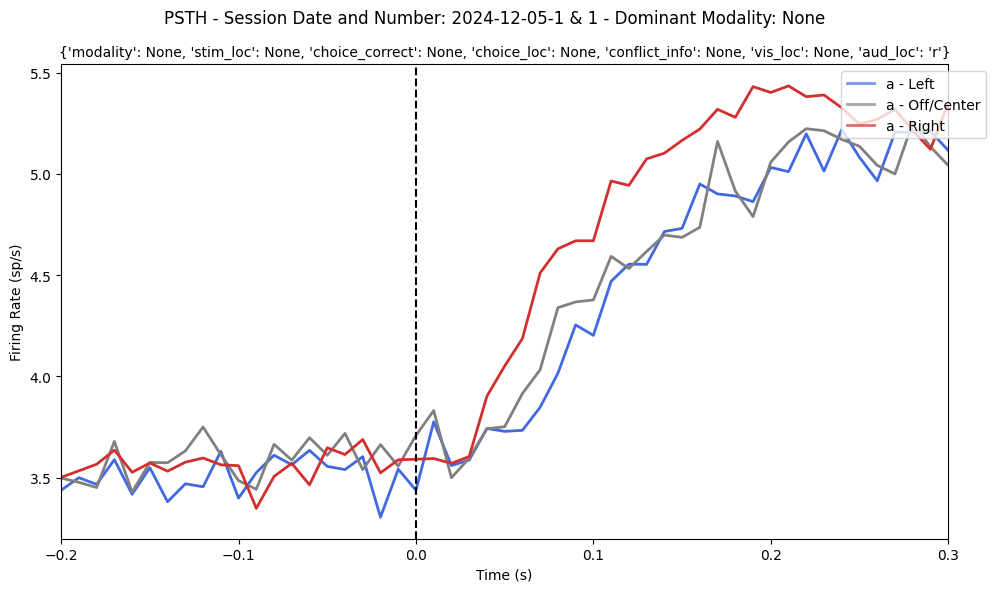

In [5]:
obj = data.session_data_obj[1]
obj.return_mask()
obj.plot_psth(color_based_on = 'a',
              xlim=(-0.2, 0.3),
              only_average = True) # mean firing rate of neuron X over all trials

### Per stimulus

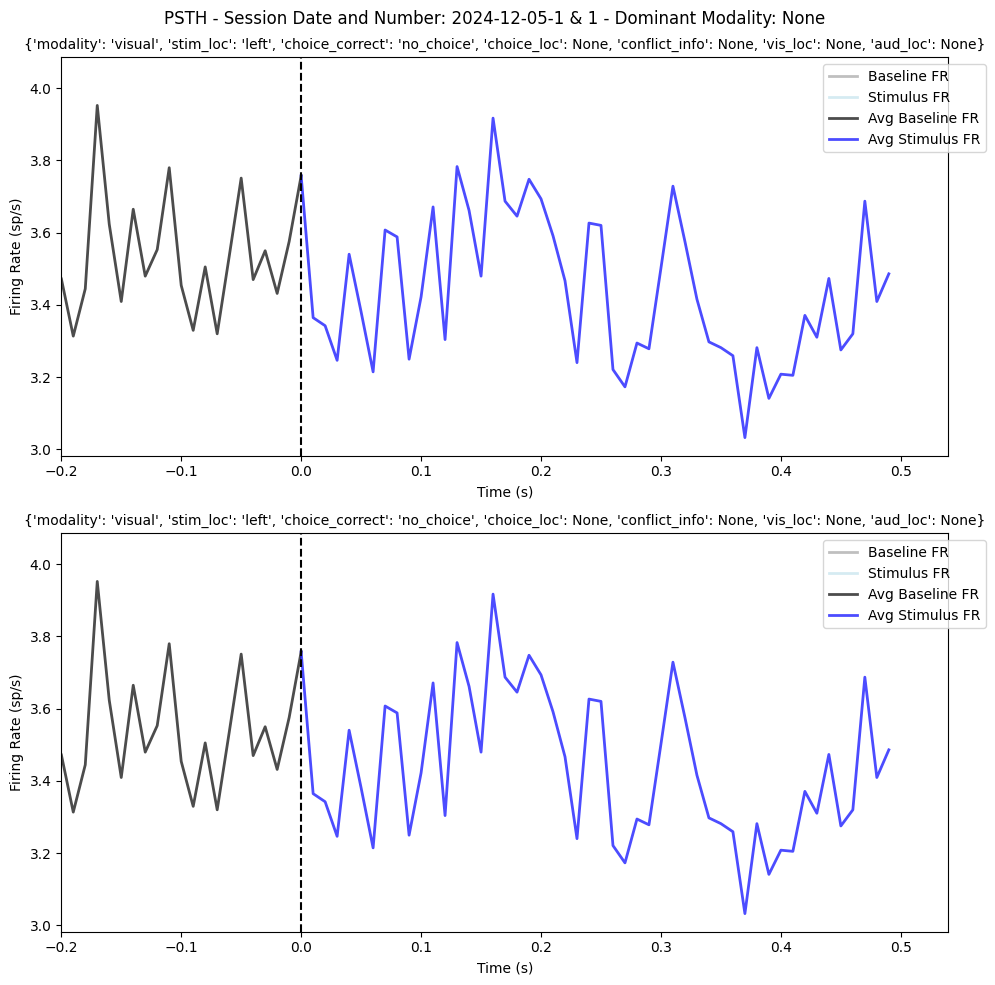

In [6]:
obj.return_mask(stim_loc= 'left', modality = 'visual', choice_correct= 'no_choice')

obj.plot_psth(figsize = (10, 10),
			  xlim = (-0.2, None),
			  ylim = (None, None),
			  filter_info = [{'modality': 'visual',
							 'stim_loc': 'left',
							 'choice_correct': None,
							 'choice_loc': None,
							 'conflict_info': None
							 },
							 {'modality': 'conflict',
							 'stim_loc': 'left',
							 'choice_correct': 'c',
							 'choice_loc': None,
							 'conflict_info': None
							 },
							 ],
			  color_based_on = None,
			  only_average = True
			  ) # mean firing rate of neuron X over all trials


## Raster Plot of a neuron across trials

### All stimuli

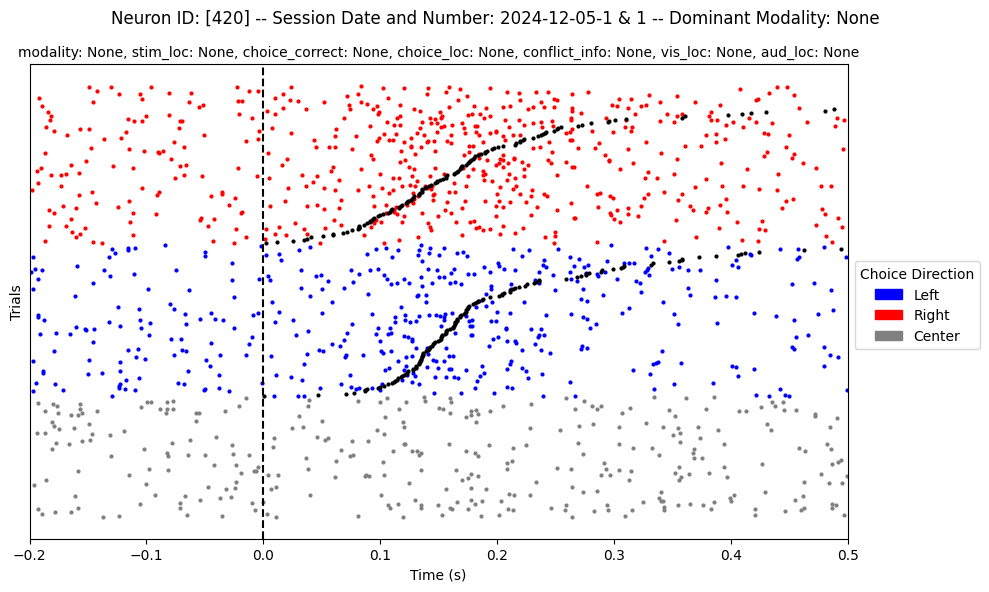

In [7]:
obj.return_mask()
obj.plot_spike_raster(neuron_ids = [420], first_move = False,
					  sort_choice_loc = True, sort_response_time = True)

### Per stimulus

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes.py:688: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.95])


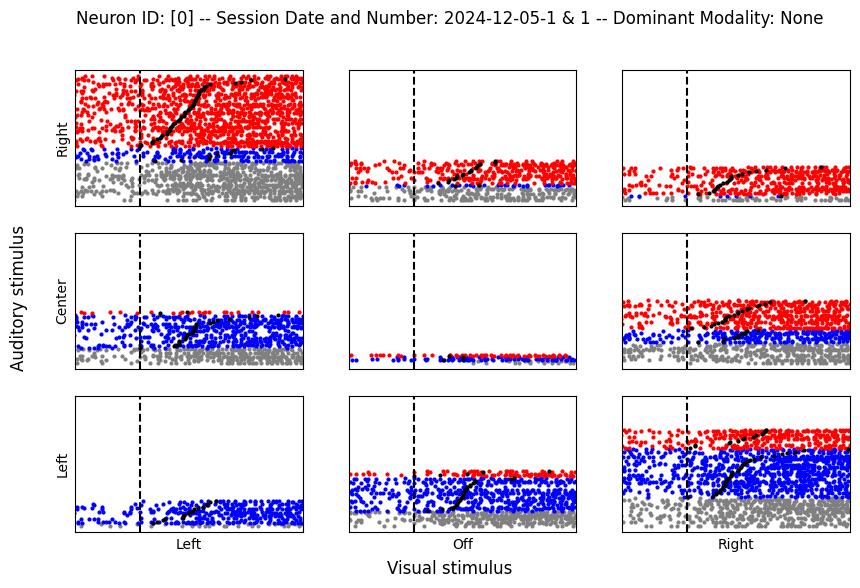

In [8]:
obj = data.session_data_obj[1]
obj.plot_spike_raster_table(neuron_ids = 0, first_move = True, sort_choice_loc = True, sort_response_time = True)

## Significant firing rate change in respond to stimulus

### All stimuli - population

#### Apply significance test

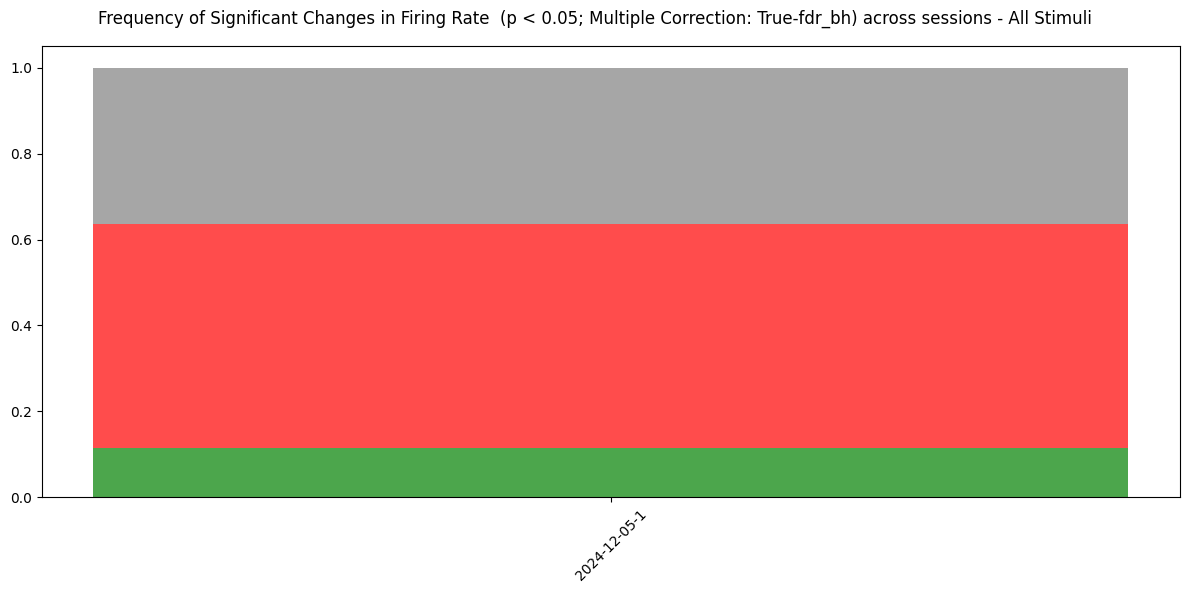

In [9]:
parametric_test = True
one_sided = True
multiple_correction = True

mc_test = 'fdr_bh' # 'bonferroni', 'sidak', 'holm', 'fdr_bh'
mc_alpha = 0.05

data.test_firing_rate_change_stimulus_sessions(parametric_test = parametric_test,
											   one_sided = one_sided,
											   multiple_correction = multiple_correction,
											   mc_test = mc_test, mc_alpha = mc_alpha)

### Per stimulus - population

plot: response to all; response to 9 (like the one before)

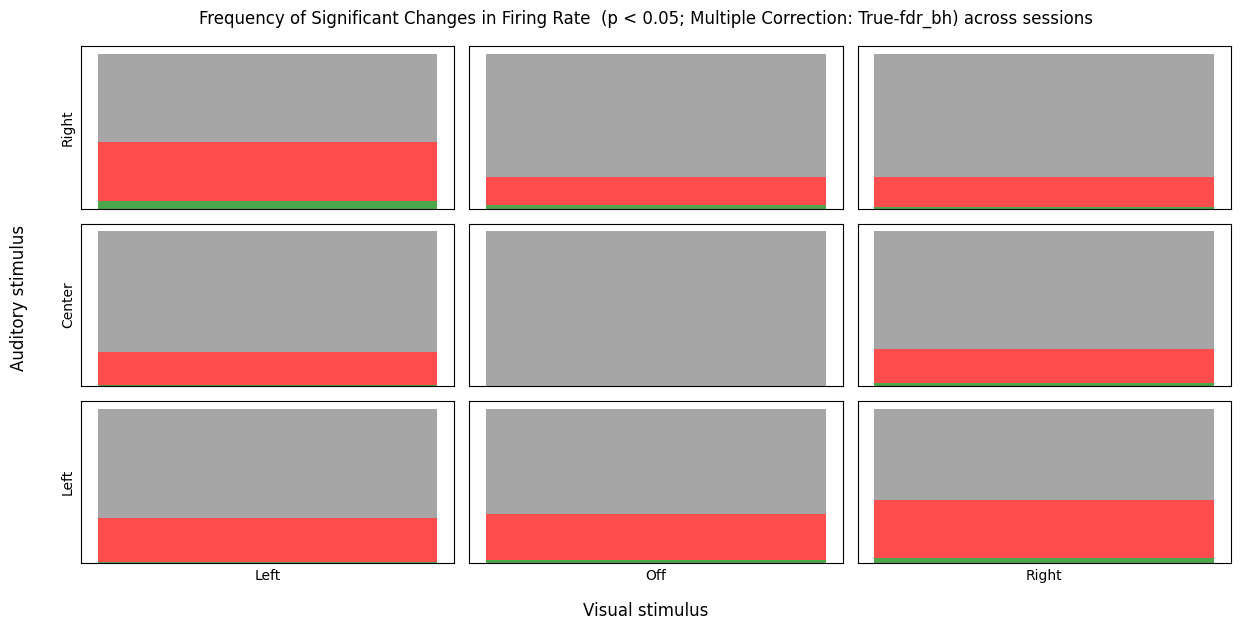

In [10]:
parametric_test = True
one_sided = True
multiple_correction = True
mc_test= 'fdr_bh'
mc_alpha = 0.05
plot = True
masks = [{'aud_loc': 'r', 'vis_loc': 'l'},
		{'aud_loc': 'c', 'vis_loc': 'l'},
		{'aud_loc': 'l', 'vis_loc': 'l'},
		{'aud_loc': 'r', 'vis_loc': 'o'},
		{'aud_loc': 'c', 'vis_loc': 'o'},
		{'aud_loc': 'l', 'vis_loc': 'o'},
		{'aud_loc': 'r', 'vis_loc': 'r'},
		{'aud_loc': 'c', 'vis_loc': 'r'},
		{'aud_loc': 'l', 'vis_loc': 'r'}]

data.test_firing_rate_change_stimulus_sessions(parametric_test = parametric_test,
											   one_sided = one_sided,
											   multiple_correction = multiple_correction,
											   mc_test = mc_test, mc_alpha = mc_alpha, masks = masks)

# Find important neurons

In [11]:
variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')

In [12]:
import seaborn as sns

In [13]:
masks = [
    {'vis_loc': 'l'},
	{'aud_loc': 'r', 'vis_loc': 'l'},
	{'aud_loc': 'c', 'vis_loc': 'l'},
	{'aud_loc': 'l', 'vis_loc': 'l'},
	# {'vis_loc': 'o'},
	# {'aud_loc': 'r', 'vis_loc': 'o'},
	# {'aud_loc': 'c', 'vis_loc': 'o'},
	# {'aud_loc': 'l', 'vis_loc': 'o'},
	# {'vis_loc': 'r'},
	# {'aud_loc': 'r', 'vis_loc': 'r'},
	# {'aud_loc': 'c', 'vis_loc': 'r'},
	# {'aud_loc': 'l', 'vis_loc': 'r'},
	# {'aud_loc': 'l'},
	# {'aud_loc': 'c'},
	# {'aud_loc': 'r'},
	# {'choice_loc': 'l'},
	# {'choice_loc': 'no_choice'},
	# {'choice_loc': 'r'},
	# {'aud_loc': 'r', 'vis_loc': 'l', 'choice_loc': 'l'},
	# {'aud_loc': 'l', 'vis_loc': 'r', 'choice_loc': 'l'},
	# {'aud_loc': 'l', 'vis_loc': 'l', 'choice_loc': 'l'},
	# {'aud_loc': 'r', 'vis_loc': 'r', 'choice_loc': 'r'},
	# {'aud_loc': 'l', 'vis_loc': 'r', 'choice_loc': 'r'},
	# {'aud_loc': 'r', 'vis_loc': 'l', 'choice_loc': 'r'},
  ]

# PCA

In [17]:
from pca_utils import apply_pca

## All trials

In [18]:
obj.return_mask()
variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')

### All neurons

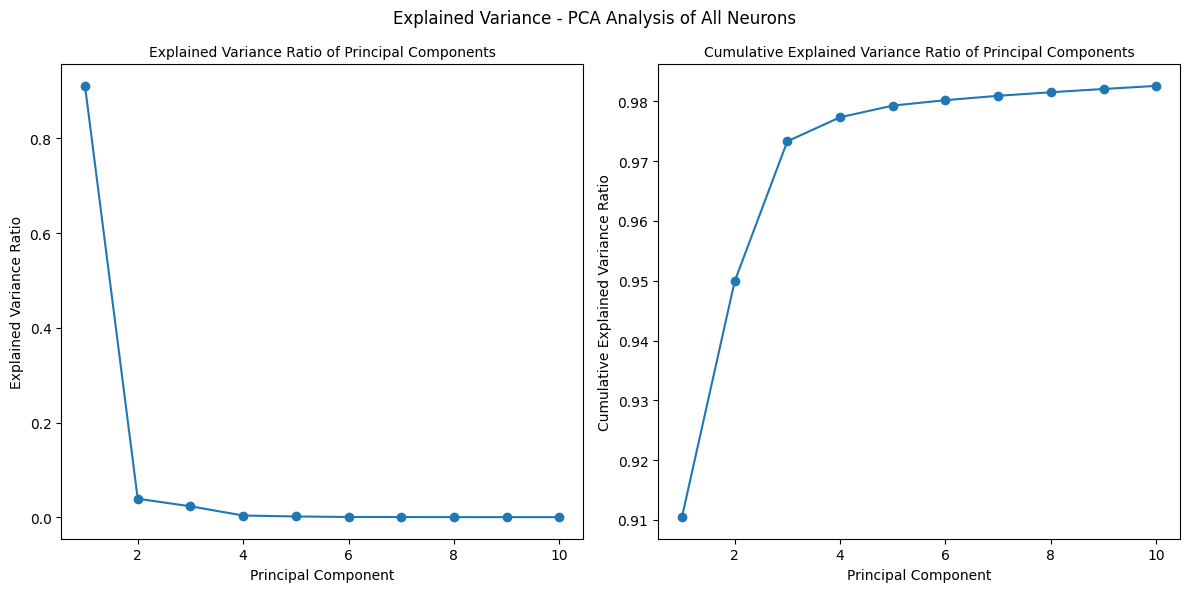

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pca_utils.py:79: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_0 = ax.scatter(pca_projection[:, axis_pc[i][0]], pca_projection[:, axis_pc[i][1]], s=10, c=colors, cmap='coolwarm')


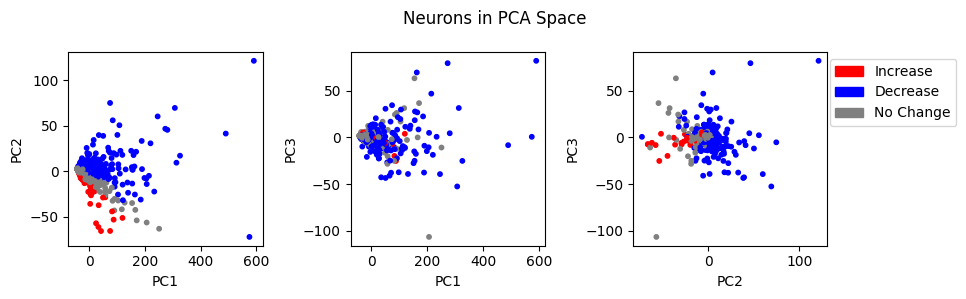

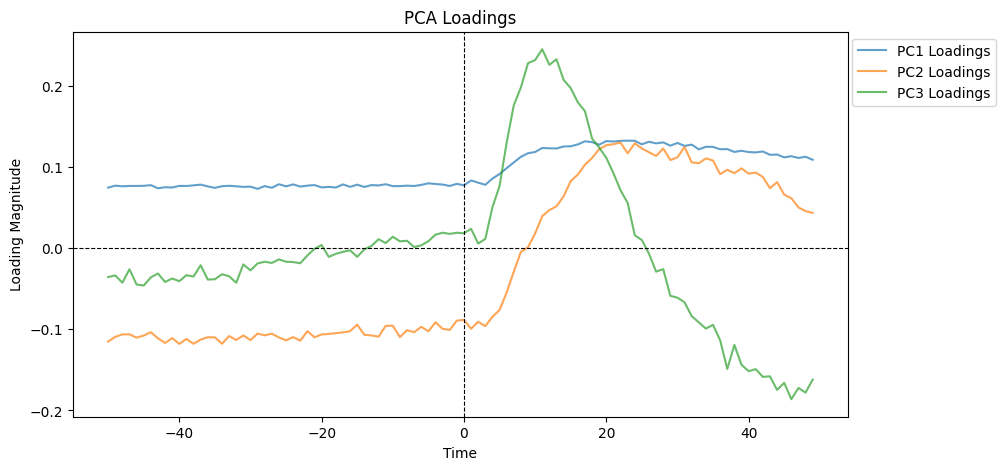

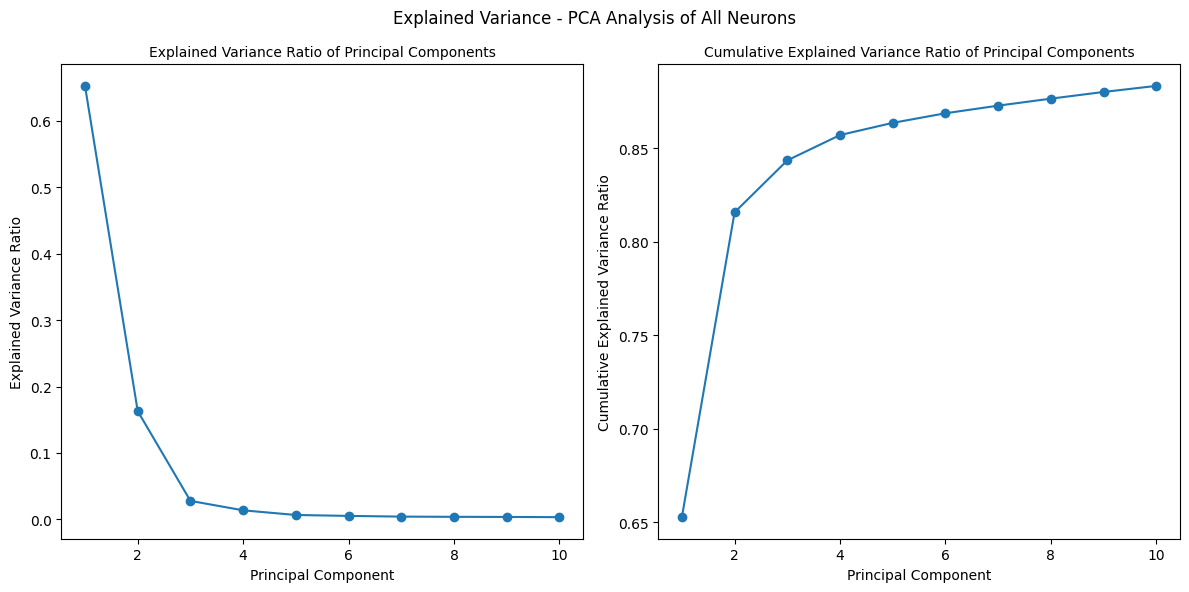

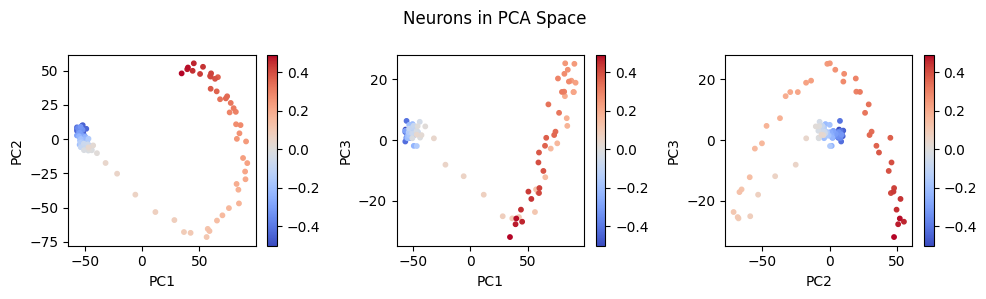

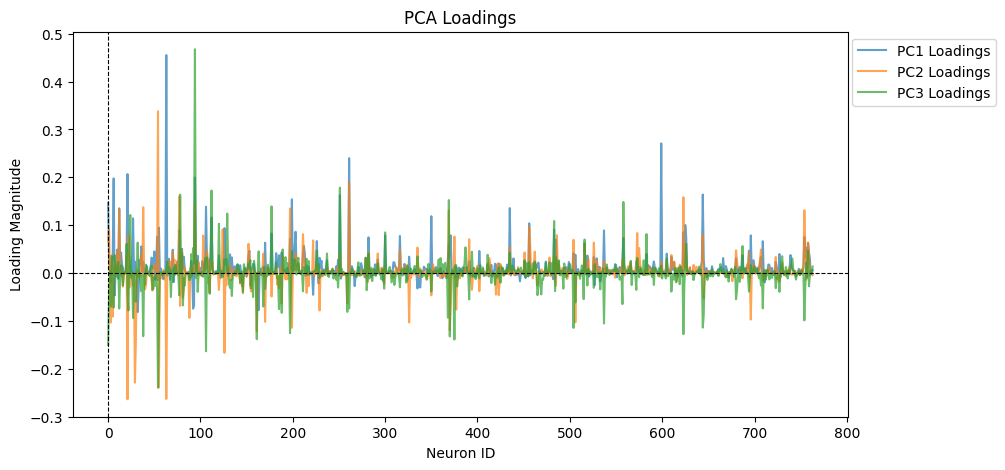

In [19]:
pca_objects = apply_pca(obj, increased_neurons, decreased_neurons, n_components = 10, all_neurons = True, increased = None,
                               axis_pc = [[0,1],[0,2],[1,2]],
							   loading_pc = [0,1,2])

### Only responsive neurons

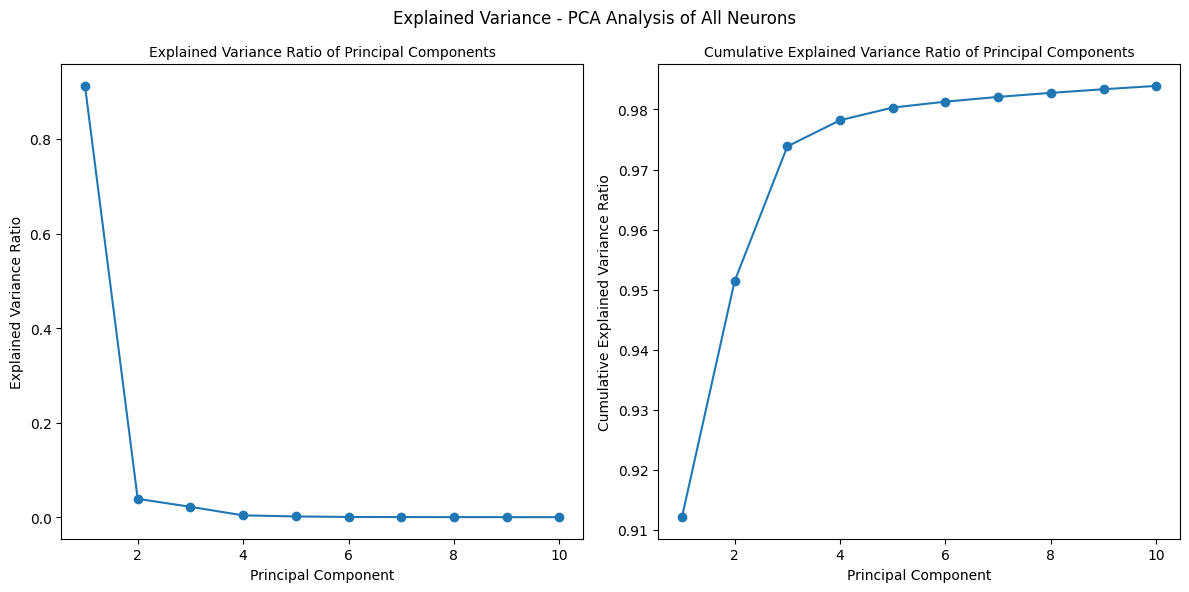

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pca_utils.py:79: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_0 = ax.scatter(pca_projection[:, axis_pc[i][0]], pca_projection[:, axis_pc[i][1]], s=10, c=colors, cmap='coolwarm')


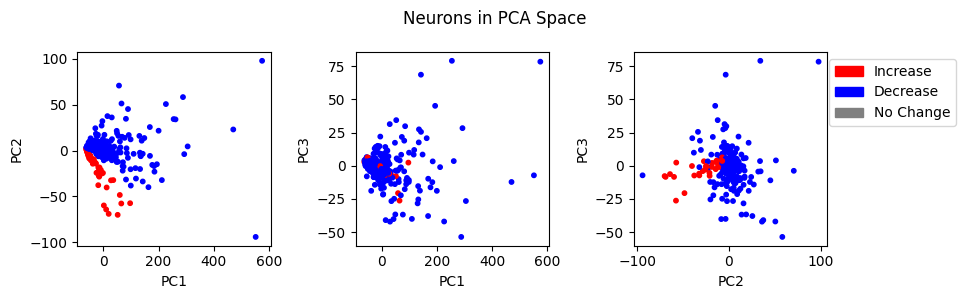

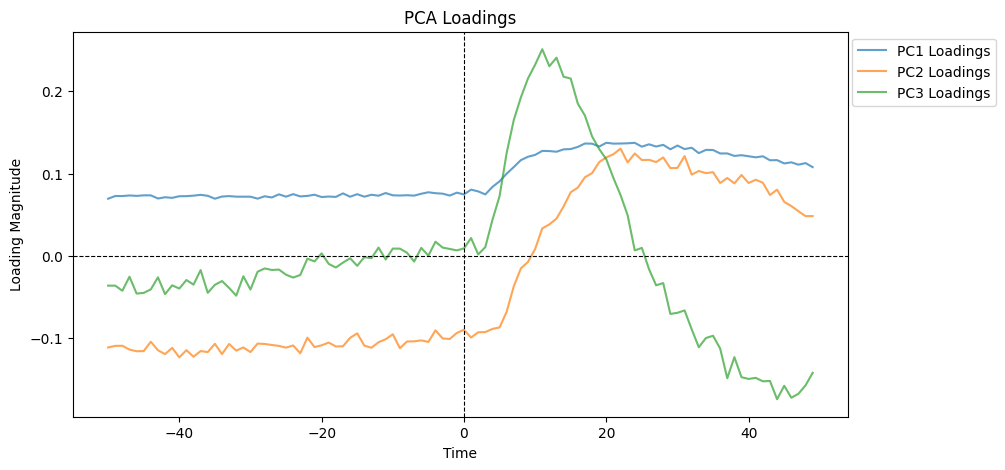

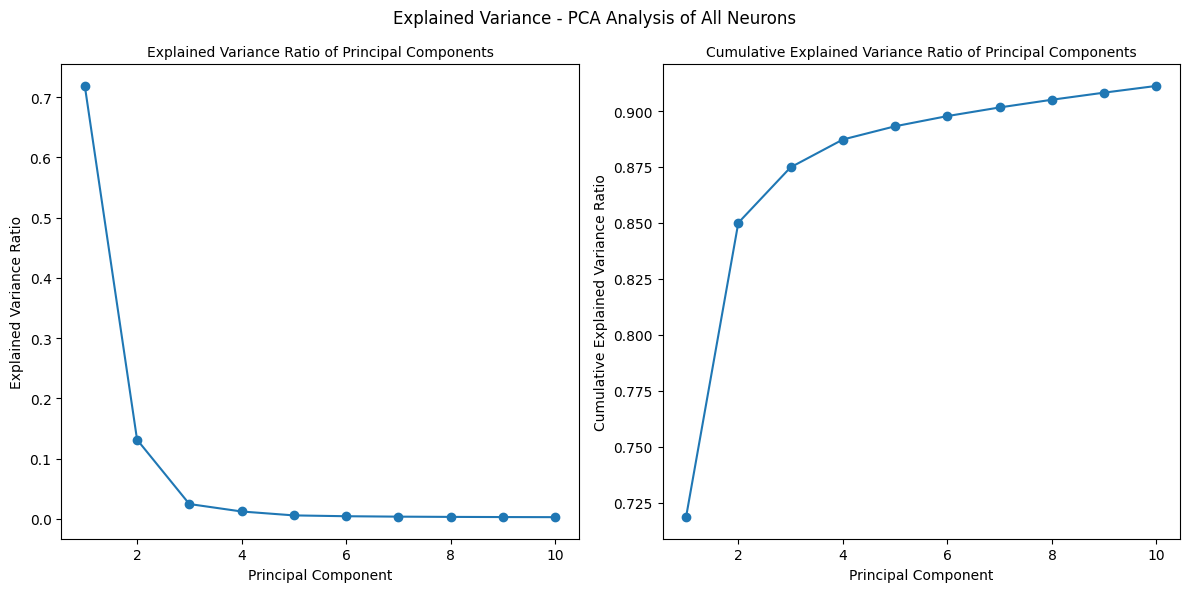

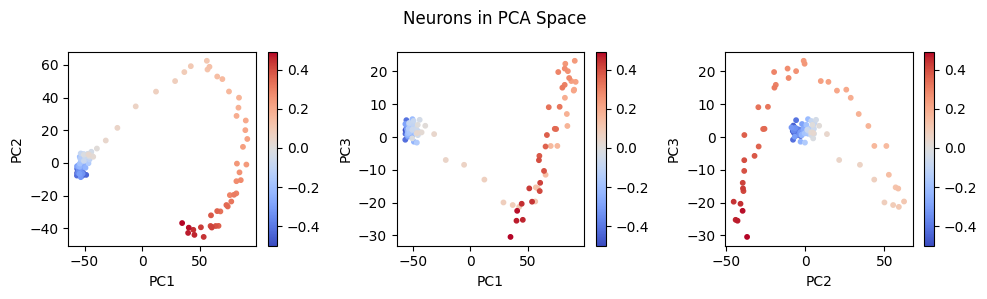

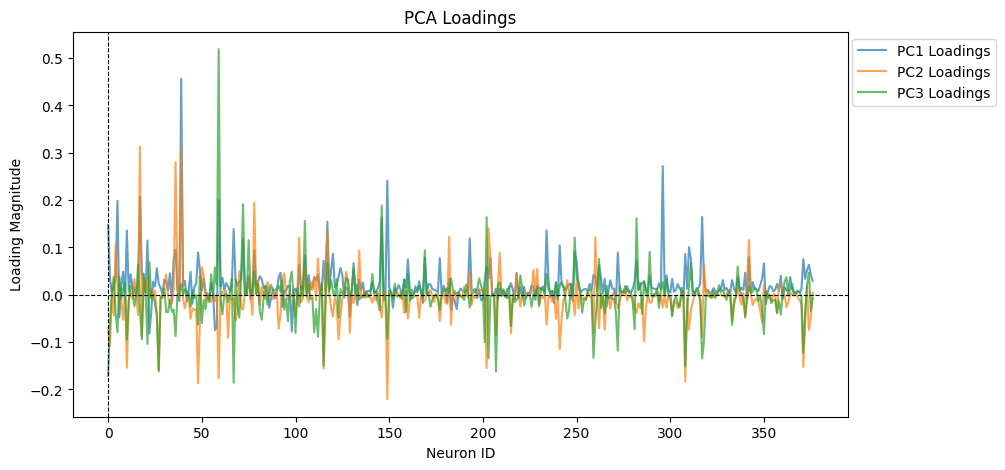

In [20]:
pca_objects = apply_pca(obj, increased_neurons, decreased_neurons, n_components = 10, all_neurons = False, increased = None,
                               axis_pc = [[0,1],[0,2],[1,2]],
							   loading_pc = [0,1,2])

## Select trials

### All neurons

In [21]:
obj.return_mask(choice_loc= 'r')
variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')

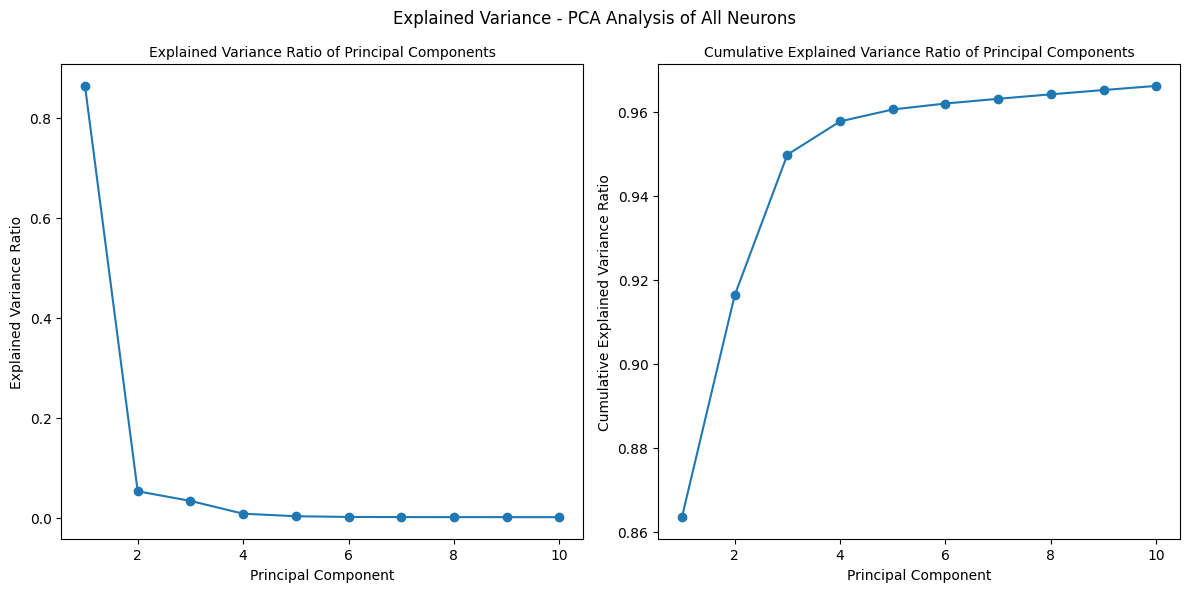

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pca_utils.py:79: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_0 = ax.scatter(pca_projection[:, axis_pc[i][0]], pca_projection[:, axis_pc[i][1]], s=10, c=colors, cmap='coolwarm')


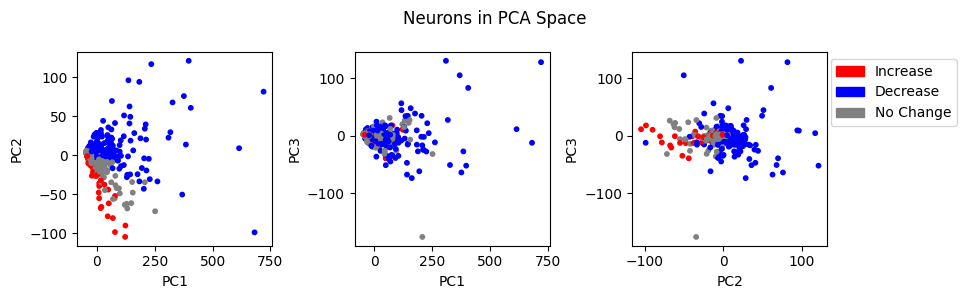

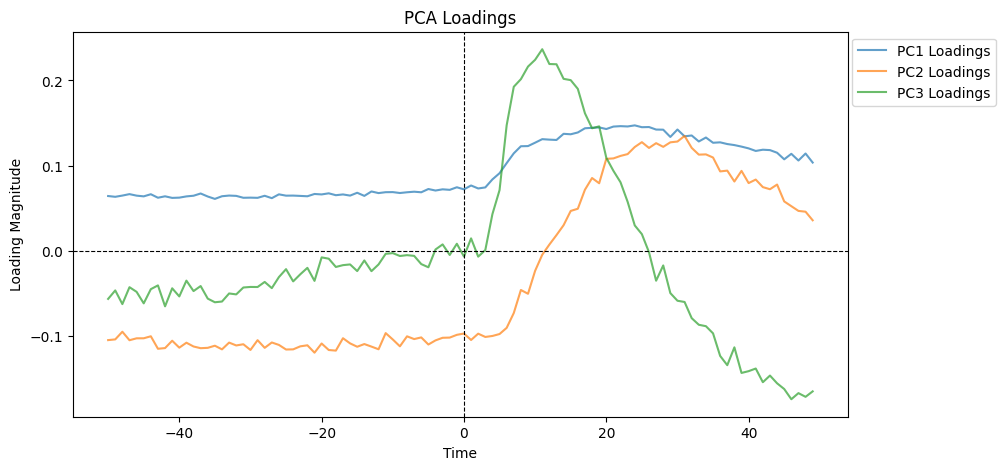

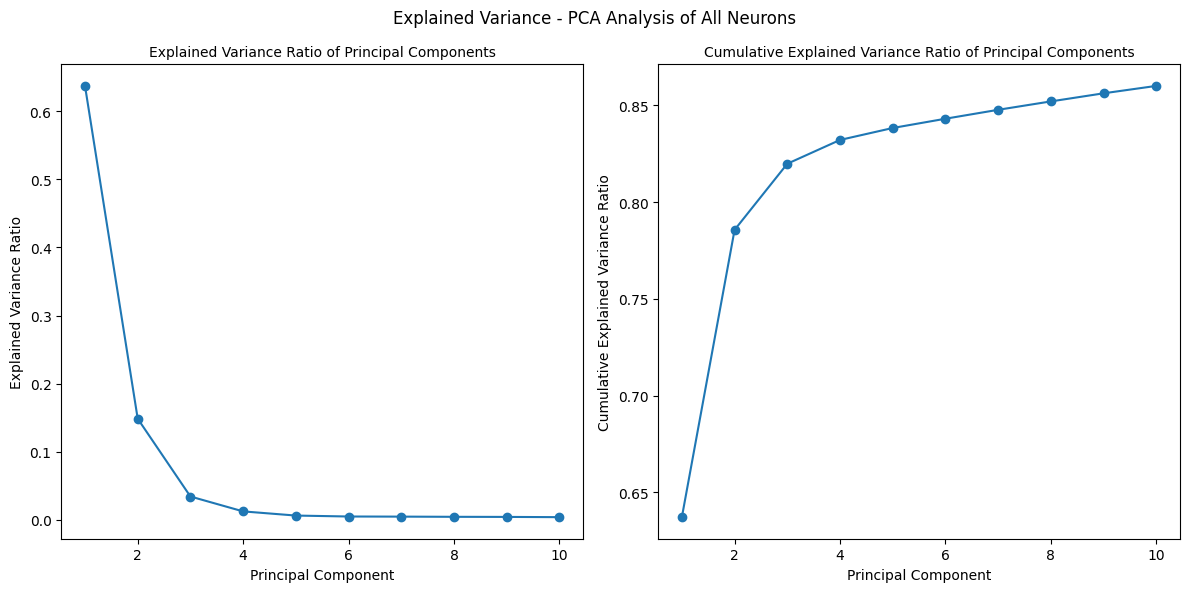

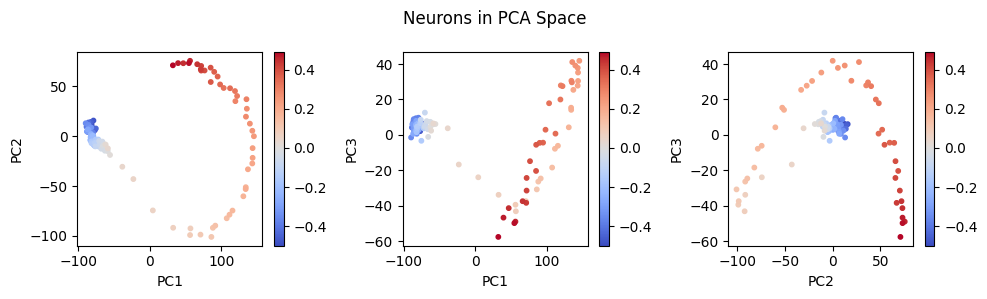

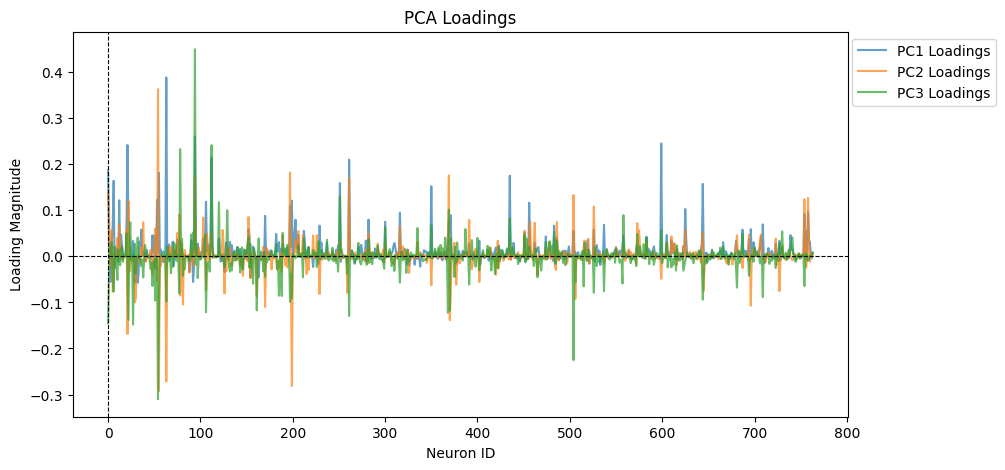

In [22]:
pca_objects = apply_pca(obj, increased_neurons, decreased_neurons, n_components = 10, all_neurons = True, increased = None,
                               axis_pc = [[0,1],[0,2],[1,2]],
							   loading_pc = [0,1,2])

### Only responsive neurons

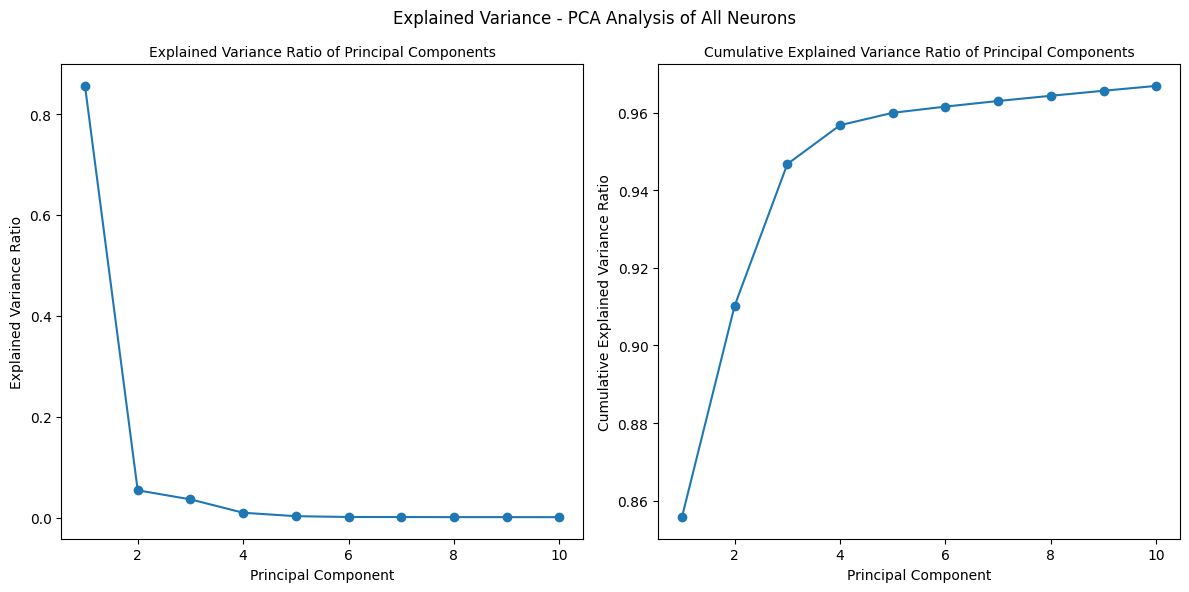

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pca_utils.py:79: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_0 = ax.scatter(pca_projection[:, axis_pc[i][0]], pca_projection[:, axis_pc[i][1]], s=10, c=colors, cmap='coolwarm')


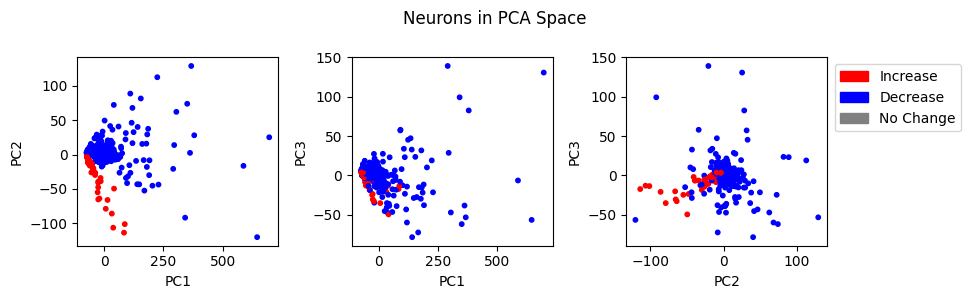

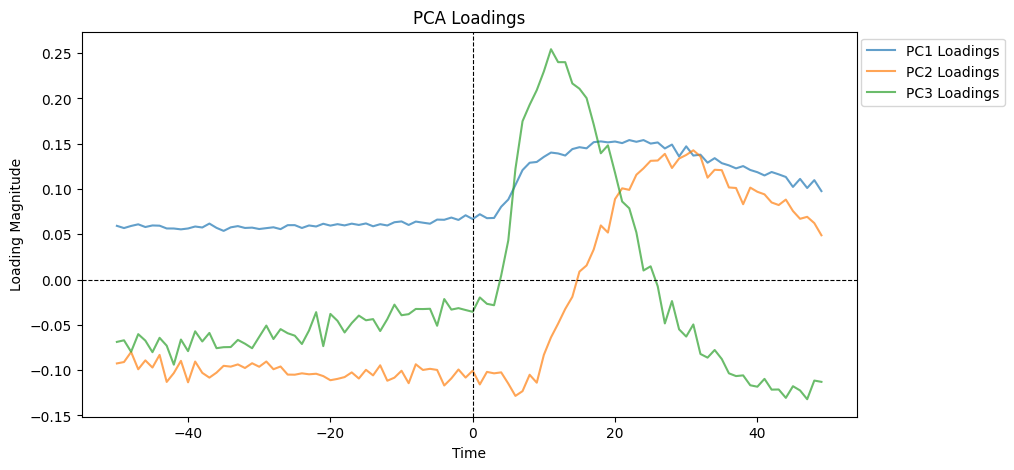

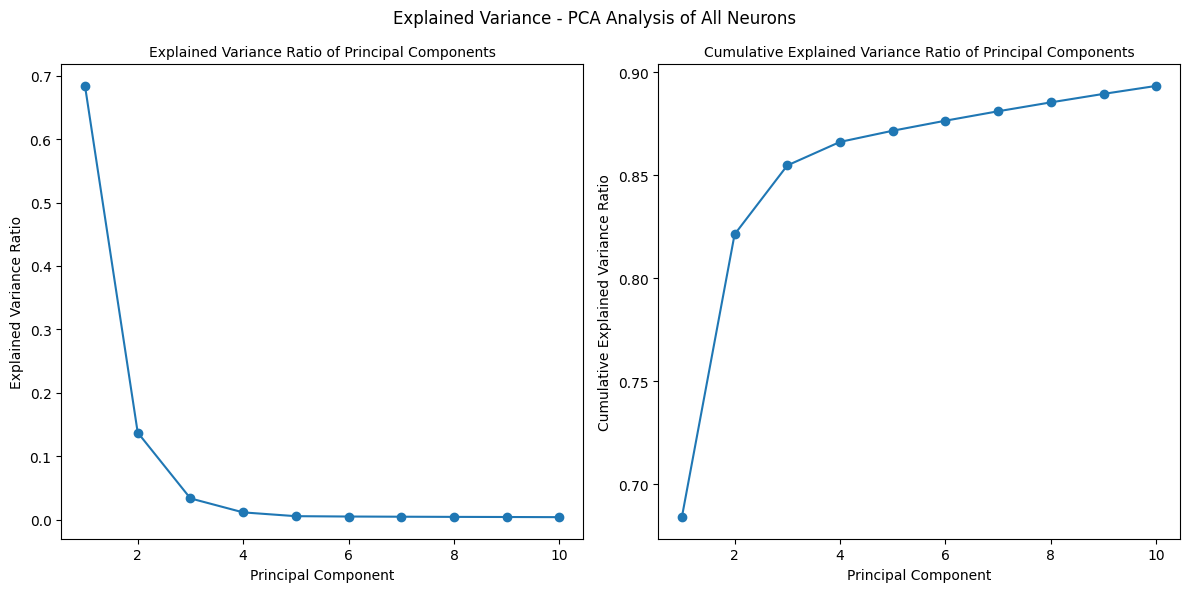

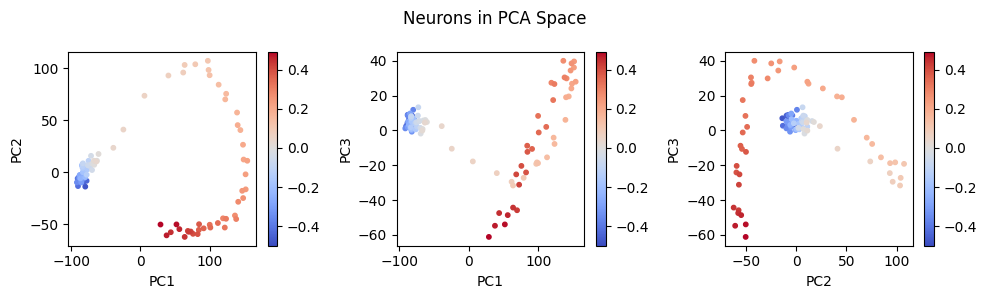

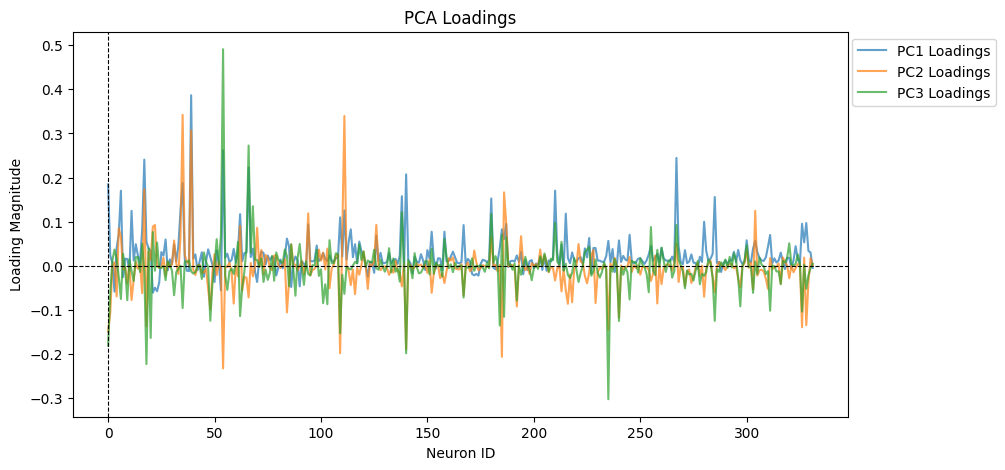

In [23]:
obj.return_mask(choice_loc= 'r', choice_correct= 'c')
variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')
pca_objects = apply_pca(obj, increased_neurons, decreased_neurons, n_components = 10, all_neurons = False, increased = None,
                               axis_pc = [[0,1],[0,2],[1,2]],
							   loading_pc = [0,1,2])

## Create PCA space with all neurons then project seperately

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pca_utils.py:79: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_0 = ax.scatter(pca_projection[:, axis_pc[i][0]], pca_projection[:, axis_pc[i][1]], s=10, c=colors, cmap='coolwarm')


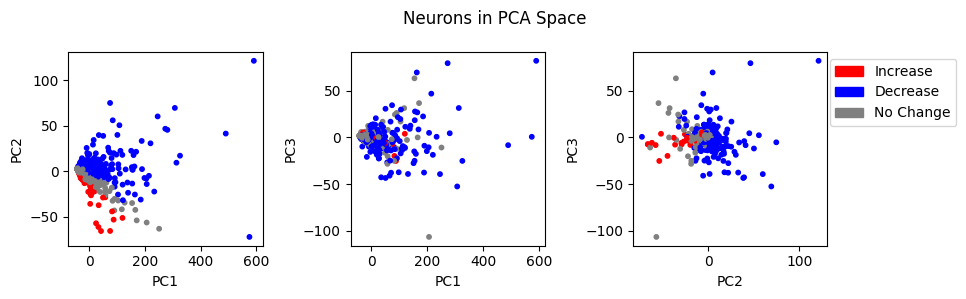

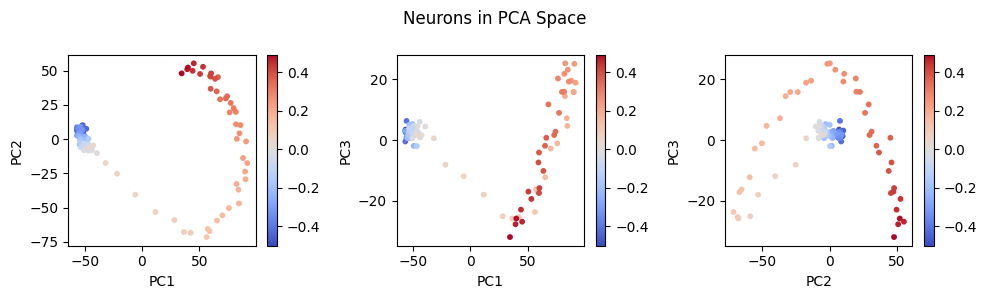

In [24]:
obj.return_mask()
variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')
pca_objects = apply_pca(obj, increased_neurons, decreased_neurons, n_components = 10, all_neurons = True, increased = None,
                               axis_pc = [[0,1],[0,2],[1,2]],
							   loading_pc = [0,1,2], plot_loadings=False, plot_projections=True, plot_variance=False)

In [25]:
from pca_utils import prep_for_pca
projected_data = []

masks = [
	{'aud_loc': 'r', 'vis_loc': 'l'},
	{'aud_loc': 'r', 'vis_loc': 'o'},
	{'aud_loc': 'r', 'vis_loc': 'r'},
	{'aud_loc': 'c', 'vis_loc': 'l'},
	{'aud_loc': 'c', 'vis_loc': 'o'},
	{'aud_loc': 'c', 'vis_loc': 'r'},
	{'aud_loc': 'l', 'vis_loc': 'l'},
	{'aud_loc': 'l', 'vis_loc': 'o'},
	{'aud_loc': 'l', 'vis_loc': 'r'}
  ]

In [26]:
for mask in masks:
    obj.return_mask(**mask)
    variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')
    neurons_of_interest, _, trial_avaraged, time_avaraged, colors = prep_for_pca(obj, increased_neurons= increased_neurons,
																			decreased_neurons = decreased_neurons,
																			all_neurons = True, increased = True)
    projected_data.append(pca_objects[1].transform(trial_avaraged.T))

Text(-0.02, 0.5, 'Auditory stimulus')

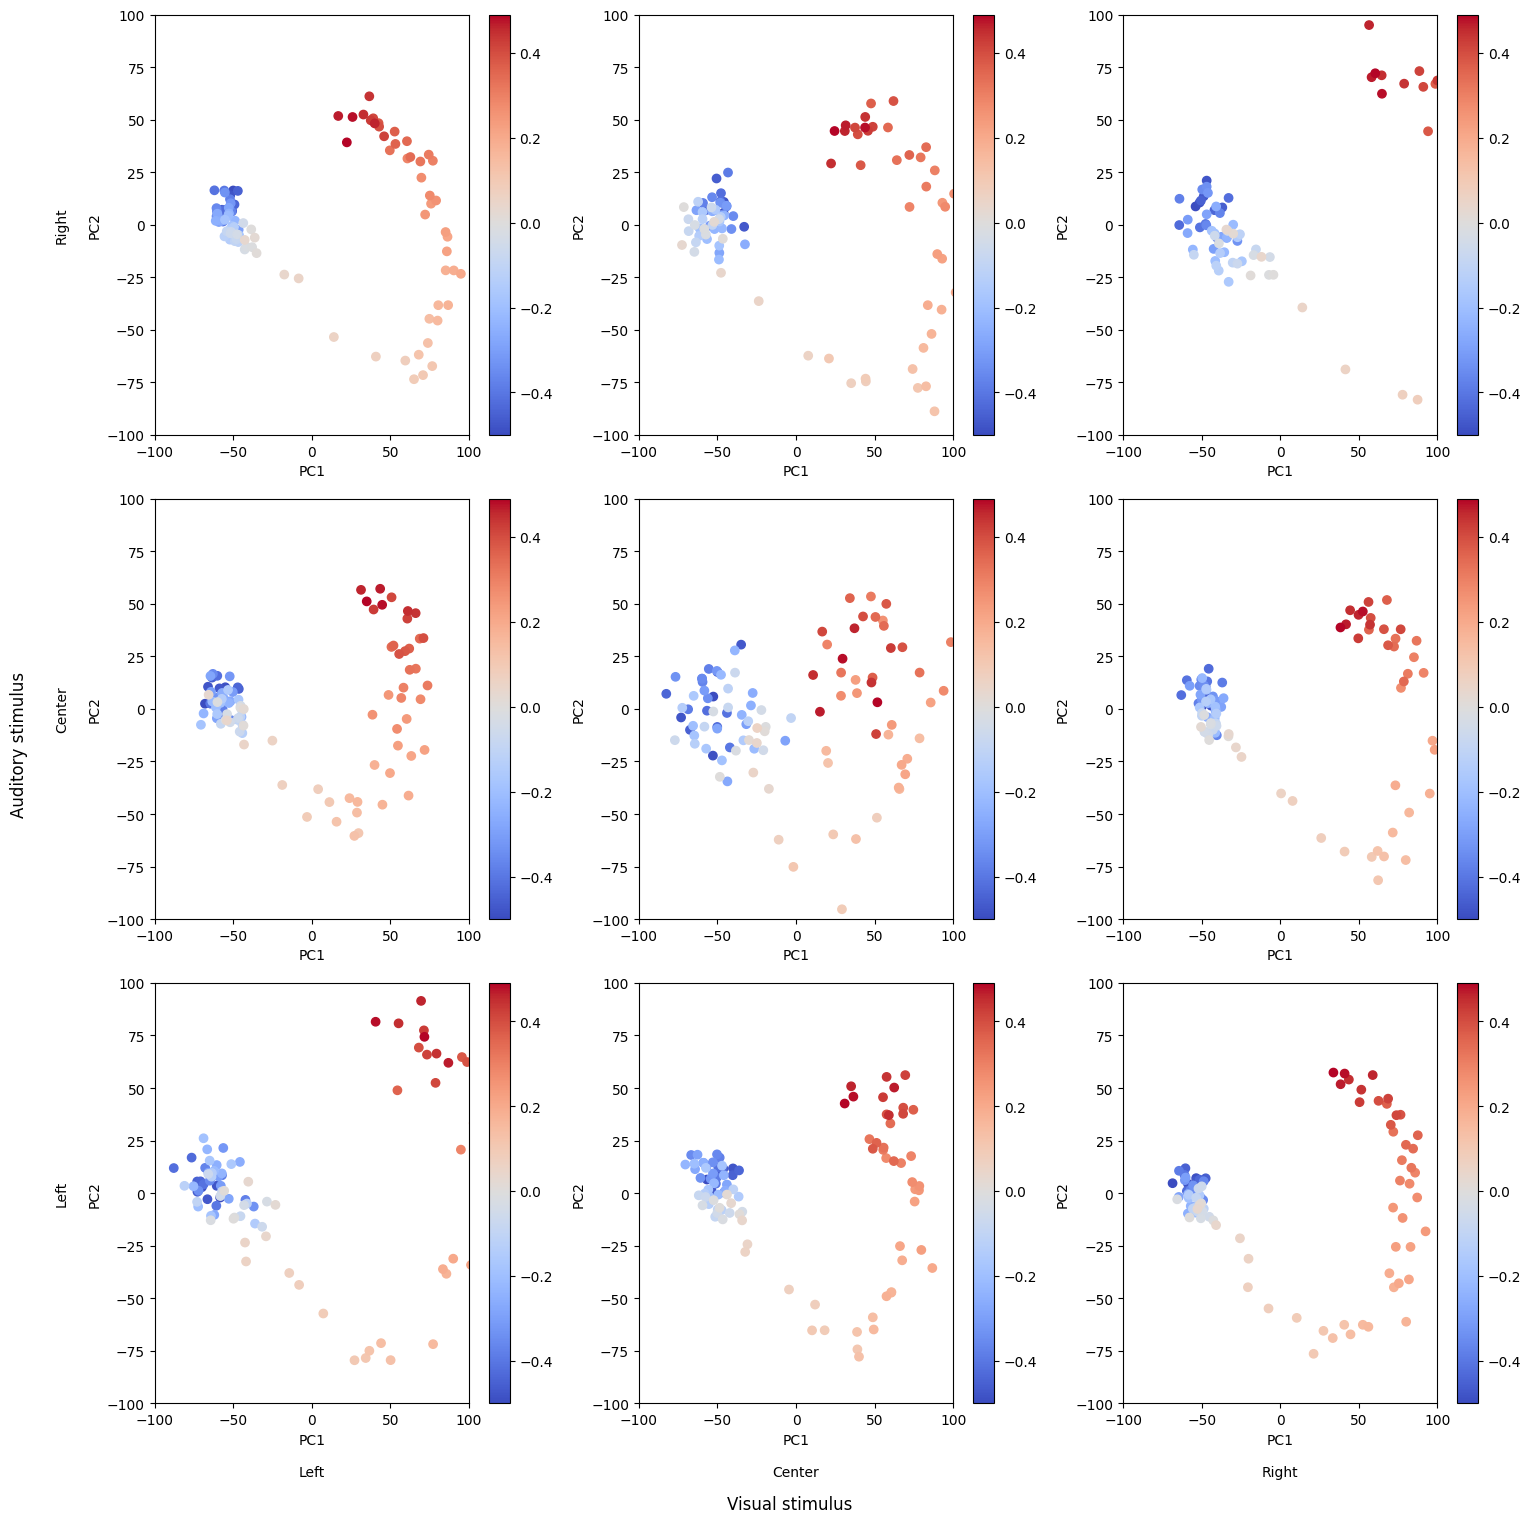

In [32]:
axis_pc = [0,1]

colors = np.concatenate([obj.baseline_times,obj.stimulus_times])
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()
for i, ax in enumerate(axs):
	scatter = ax.scatter(projected_data[i][:, axis_pc[0]], projected_data[i][:, axis_pc[1]], c=colors,cmap='coolwarm')
	ax.set_xlim(-100,100)
	ax.set_ylim(-100,100)
	ax.set_xlabel(f'PC{axis_pc[0]+1}')
	ax.set_ylabel(f'PC{axis_pc[1]+1}')
	fig.colorbar(scatter, ax=ax)
axs[0].set_ylabel(f'Right\n\nPC{axis_pc[1]+1}')
axs[3].set_ylabel(f'Center\n\nPC{axis_pc[1]+1}')
axs[6].set_ylabel(f'Left\n\nPC{axis_pc[1]+1}')
axs[6].set_xlabel(f'PC{axis_pc[0]+1}\n\nLeft')
axs[7].set_xlabel(f'PC{axis_pc[0]+1}\n\nCenter')
axs[8].set_xlabel(f'PC{axis_pc[0]+1}\n\nRight')
plt.tight_layout()
fig.text(0.5, -0.01, 'Visual stimulus', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Auditory stimulus', va='center', rotation='vertical', fontsize=12)

# Concatenate trials

In [33]:
masks = [{'aud_loc': 'r', 'vis_loc': 'l'},
		{'aud_loc': 'c', 'vis_loc': 'l'},
		{'aud_loc': 'l', 'vis_loc': 'l'},
		{'aud_loc': 'r', 'vis_loc': 'o'},
		{'aud_loc': 'c', 'vis_loc': 'o'},
		{'aud_loc': 'l', 'vis_loc': 'o'},
		{'aud_loc': 'r', 'vis_loc': 'r'},
		{'aud_loc': 'c', 'vis_loc': 'r'},
		{'aud_loc': 'l', 'vis_loc': 'r'}]

In [34]:
new_array = np.empty((obj.formatted_data_array['firing_rate']['baseline'].shape[0], len(masks)*100))
for i, mask in enumerate(masks):
	obj.return_mask(**mask)
	new_array[:, i*100:(i+1)*100-50] = obj.formatted_data_array['firing_rate']['baseline'][:,obj.mask_interest_indices].mean(axis=1)
	new_array[:,(i+1)*100-50:(i+1)*100] = obj.formatted_data_array['firing_rate']['stimulus'][:,obj.mask_interest_indices].mean(axis=1)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=10)
projections = pca.fit_transform(new_array)


# TBD

In [33]:
# average firing rate across neurons

In [34]:
# dimension reduction - which neurons increase/decrease together 
# or at least find the ones that increase activity for a specific stimulus

# is it the case for all stimuli or only for some stimuli
# are there any specific neurons that are always increasing/decreasing together
# are there any specific stimuli that are always increasing/decreasing together


In [35]:
# firing rate variabili

In [36]:
# firing rate across different stimulus intensities
# correlation bw neuron firing rate changes and stimulus intensity

In [37]:
# Correlation Between Neurons

In [38]:
# Latency of Neuronal Response

In [39]:
# # obj.trials
obj.formatted_data_array['firing_rate']['baseline'].shape
# obj.return_mask()
# obj.mask_interest_indices.shape
# obj.formatted_data_arra

(786, 461, 50)